<a href="https://colab.research.google.com/github/Malekkamoua/PFE/blob/main/2_Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
org = pd.read_csv('/content/gdrive/MyDrive/Datascience/Datasets/dataset_after_ops.csv')

df = pd.read_csv('/content/gdrive/MyDrive/Datascience/Datasets/dataset_after_ops.csv')

df.dropna(inplace = True)
df.drop('date', axis=1, inplace=True)

print(len(df))
df.head()

3422


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Purity
0,55.2,16.98,3163.452165,578.910104,398.770942,10.113760,1.729498,251.177960,250.208694,250.175988,...,450.343243,446.972364,450.622040,449.948988,455.523590,464.487434,450.111873,66.91,1.31,1
1,55.2,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,...,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11,1
2,55.2,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,250.046350,...,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27,1
3,55.2,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,250.120861,...,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36,1
4,55.2,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,250.013500,...,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34,1


# Feature selection with Filter methods


## Variance Threshold

In [ ]:
#A point beyond which there is a change in the manner a program executes

In [ ]:
# It removes all features which variance doesn’t meet some threshold.
# By default, it removes all zero-variance features, i.e., features that have the same value in all samples. 
# We assume that features with a higher variance may contain more useful information, but note that we are
# not taking the relationship between feature variables or feature and target variables into account, which 
# is one of the drawbacks of filter methods.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

df_variance_threshhold = df.drop(['% Silica Concentrate', 'Purity'], axis = 1)
df_variance_threshhold.head()

#why threshold = 0.5 ?
vt = VarianceThreshold(threshold=0.5)
vt.fit(df_variance_threshhold.sample(1000))

mask = vt.get_support()
chosen_features = list(df_variance_threshhold.loc[:, mask].columns)
removed_features = [feature for feature in df_variance_threshhold.columns if feature not in chosen_features]

print('Chosen features: {}'.format(chosen_features))
print('Removed features: {}'.format(removed_features))

Chosen features: ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate']
Removed features: ['Ore Pulp pH', 'Ore Pulp Density']


# Feature selection with Embedded methods


**Preparing data for classifiers**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def prepare_data(df):

  X = df.drop(['% Silica Concentrate', 'Purity'], axis=1)
  y = df['% Silica Concentrate']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  # normalize the input values
  mms = MinMaxScaler()
  X_train = mms.fit_transform(X_train)
  X_test = mms.transform(X_test)

  return X_train, y_train, X_test, y_test

In [ ]:
# Feature ranking with recursive feature elimination.

# Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE)
# is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features 
# and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current
# set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

from sklearn.feature_selection import RFE
from matplotlib import pyplot

def feature_ranking_rfe(model):
  #number of features
  nof_list=np.arange(1,24)            
  high_score=0

  nof=0           
  score_list =[]

  X = df.drop(['% Silica Concentrate', 'Purity'], axis=1)
  y = df['% Silica Concentrate']

  for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score > high_score):
        high_score = score
        nof = nof_list[n]

  #calculating with the optimal number
  cols = list(X.columns)
  rfe = RFE(estimator=model, n_features_to_select=nof)
  X_rfe = rfe.fit_transform(X,y)  
  model.fit(X_rfe,y)              
  temp = pd.Series(rfe.support_,index = cols)
  selected_features_rfe = temp[temp==True].index

  features = { 'Model': model.__class__.__name__,
      'Number of features':  nof,
          'Highest feature score': high_score,
          'Selected features': [selected_features_rfe]}
  
  features = pd.DataFrame(features)
  ranking = pd.DataFrame(zip(X.columns, rfe.ranking_), columns=['Feature', 'Ranking']).sort_values('Ranking')

  if model.__class__.__name__ == 'LinearRegression':
    importance = model.coef_
  else:
    importance = model.feature_importances_
  
  for feature, score in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (feature,score))
    
  pyplot.bar([x for x in range(len(importance))], importance)
  pyplot.show()

  return features, ranking


## **Linear regression**

Feature: 0, Score: 0.72211
Feature: 1, Score: 1.08786
Feature: 2, Score: -0.20495
Feature: 3, Score: 0.24813
Feature: 4, Score: 0.20469
Feature: 5, Score: 0.15213
Feature: 6, Score: 0.23354
Feature: 7, Score: -0.98644
Feature: 8, Score: -0.26183
Feature: 9, Score: 0.42665
Feature: 10, Score: 0.12855
Feature: 11, Score: 0.29472
Feature: 12, Score: -0.46667
Feature: 13, Score: 0.20615
Feature: 14, Score: -0.13402
Feature: 15, Score: -0.15035
Feature: 16, Score: -0.19937
Feature: 17, Score: -0.28423
Feature: 18, Score: -0.04147
Feature: 19, Score: -0.09119
Feature: 20, Score: 0.20124
Feature: 21, Score: -4.29515


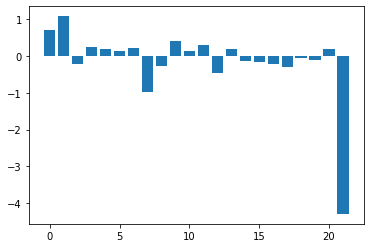

In [ ]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

model = LinearRegression()

X_train, y_train, X_test, y_test = prepare_data(df)
model.fit(X_train, y_train)

importance = model.coef_

for feature, score in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (feature,score))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.03422
Feature: 1, Score: 0.03534
Feature: 2, Score: -0.00003
Feature: 3, Score: 0.00051
Feature: 4, Score: 0.00557
Feature: 5, Score: 0.10525
Feature: 6, Score: 0.89978
Feature: 7, Score: -0.00593
Feature: 8, Score: -0.00232
Feature: 9, Score: 0.00226
Feature: 10, Score: -0.00512
Feature: 11, Score: 0.02043
Feature: 12, Score: -0.00254
Feature: 13, Score: 0.00193
Feature: 14, Score: -0.00033
Feature: 15, Score: -0.00025
Feature: 16, Score: -0.00025
Feature: 17, Score: -0.00037
Feature: 18, Score: -0.00015
Feature: 19, Score: -0.00048
Feature: 20, Score: 0.00070
Feature: 21, Score: -0.75263


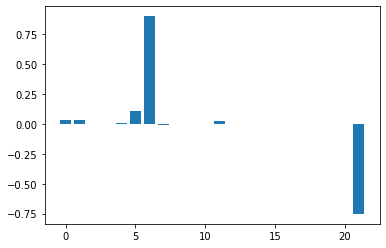

,Model,Number of features,Highest feature score,Selected features
0,LinearRegression,22,0.656229,"Index(['% Iron Feed', '% Silica Feed', 'Starch..."


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

linearRegression_rfe_features, ranking = feature_ranking_rfe(model)
linearRegression_rfe_features

## Random forest



**Feature selection with Recursive Feature Elimination (RFE)**

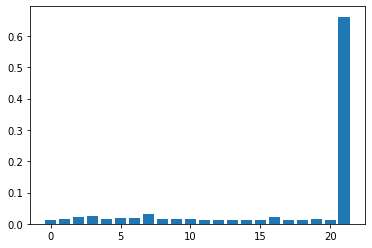

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X_train, y_train, X_test, y_test = prepare_data(df)
model.fit(X_train, y_train)
importance = model.feature_importances_

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.02180
Feature: 1, Score: 0.02267
Feature: 2, Score: 0.03098
Feature: 3, Score: 0.01805
Feature: 4, Score: 0.01833
Feature: 5, Score: 0.01876
Feature: 6, Score: 0.03544
Feature: 7, Score: 0.01725
Feature: 8, Score: 0.01956
Feature: 9, Score: 0.01777
Feature: 10, Score: 0.01717
Feature: 11, Score: 0.01671
Feature: 12, Score: 0.01759
Feature: 13, Score: 0.02440
Feature: 14, Score: 0.01830
Feature: 15, Score: 0.02157
Feature: 16, Score: 0.66366


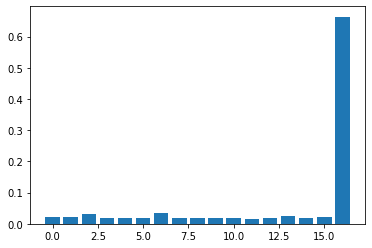

,Model,Number of features,Highest feature score,Selected features
0,RandomForestRegressor,17,0.708422,"Index(['% Silica Feed', 'Starch Flow', 'Amina ..."


In [ ]:
model = RandomForestRegressor()
randomForestRegressor_rfe_features, ranking = feature_ranking_rfe(model)
randomForestRegressor_rfe_features 

## XGBoost 

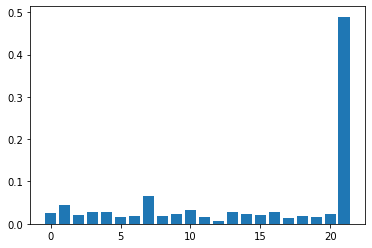

In [ ]:
from xgboost import XGBRegressor
from matplotlib import pyplot

model = XGBRegressor(objective ='reg:linear', verbosity = 0)
X_train, y_train, X_test, y_test = prepare_data(df)
model.fit(X_train, y_train)
importance = model.feature_importances_

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.03919
Feature: 1, Score: 0.03550
Feature: 2, Score: 0.06689
Feature: 3, Score: 0.03089
Feature: 4, Score: 0.03522
Feature: 5, Score: 0.03050
Feature: 6, Score: 0.03502
Feature: 7, Score: 0.72680


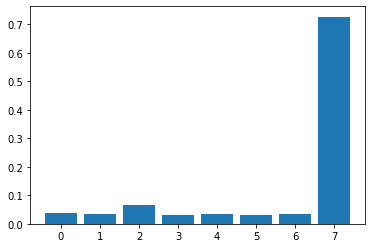

,Model,Number of features,Highest feature score,Selected features
0,XGBRegressor,8,0.716903,"Index(['% Silica Feed', 'Amina Flow', 'Flotati..."


In [ ]:
model = XGBRegressor(objective ='reg:linear', 
                     verbosity = 0, 
                     n_jobs=-1)

xgbRegressor_rfe_features, ranking = feature_ranking_rfe(model)
xgbRegressor_rfe_features


In [ ]:
feature_analysis = pd.concat([linearRegression_rfe_features, randomForestRegressor_rfe_features, xgbRegressor_rfe_features], axis=0)
feature_analysis.to_csv( "/content/gdrive/MyDrive/Datascience/PFE/datasets/selected_features.csv", index=False, encoding='utf-8')

feature_analysis

,Model,Number of features,Highest feature score,Selected features
0,LinearRegression,22,0.656229,"Index(['% Iron Feed', '% Silica Feed', 'Starch..."
0,RandomForestRegressor,17,0.708422,"Index(['% Silica Feed', 'Starch Flow', 'Amina ..."
0,XGBRegressor,8,0.716903,"Index(['% Silica Feed', 'Amina Flow', 'Flotati..."


#Final results

In [5]:
selected_features = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/selected_features.csv')
selected_features.head()

,Model,Number of features,Highest feature score,Selected features
0,LinearRegression,22,0.656229,"Index(['% Iron Feed', '% Silica Feed', 'Starch..."
1,RandomForestRegressor,17,0.708422,"Index(['% Silica Feed', 'Starch Flow', 'Amina ..."
2,XGBRegressor,8,0.716903,"Index(['% Silica Feed', 'Amina Flow', 'Flotati..."


In [6]:
variance_df = df[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 
                   'Ore Pulp Flow', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 
                   'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow',
                   'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
                   'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level',
                   'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', 
                   '% Iron Concentrate', '% Silica Concentrate', 'Purity' ]]

LR_df = df[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 
            'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow',
            'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
            'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 
            'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level',
            'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate',
            '% Silica Concentrate', 'Purity']]

RF_df = df[['% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow',
            'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 
            'Flotation Column 06 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 03 Level', 'Flotation Column 05 Level', 
            'Flotation Column 06 Level', '% Iron Concentrate', '% Silica Concentrate', 'Purity']]

XGB_df = df[['% Silica Feed', 'Amina Flow', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       '% Iron Concentrate', '% Silica Concentrate', 'Purity']]

all_dfs = [df,variance_df,LR_df, RF_df, XGB_df]


**Compare all datasets using KNN classifier's accurary**

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, mean_squared_error, r2_score
import math 

#initialisation
best_params = 0
model = 0
accuracy = 0
i = -1
max = {'dataset': i, 'accuracy': accuracy, 'best_params': best_params}

for df in all_dfs:
  i = i + 1
  X = df.drop(['% Silica Concentrate', 'Purity'], axis=1)
  y = df['% Silica Concentrate']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  mms = MinMaxScaler()
  X_train = mms.fit_transform(X_train)
  X_test = mms.transform(X_test)

  grid_params = {
      'n_neighbors' : [3,5,11,19], # Always odd numbers to avaid ties
      'weights': ['uniform', 'distance'],
      'metric': ['euclidean', 'manhattan']
  }

  grid = GridSearchCV(
      KNeighborsRegressor(),
      grid_params,
      cv = 5,
      n_jobs = -1 #use all resources
  )

  grid_results = grid.fit(X_train, y_train)
  best_params = [grid_results.best_params_['metric'],grid_results.best_params_['n_neighbors'],grid_results.best_params_['weights']]

  #KNN with the best params
  model = KNeighborsRegressor(n_neighbors=best_params[1], 
                            weights=best_params[2], 
                            metric=best_params[0], 
                            n_jobs=-1)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  mse_test = mean_squared_error(y_test, y_pred) # Mean-squared error, test
  
  test_predictions = model.predict(X_test) # prediction accuracy, test
  test_score = r2_score(y_test, test_predictions)
  
  train_predictions = model.predict(X_train) # prediction accuracy, train
  train_score = r2_score(y_train, train_predictions)

  print( {'rmse': math.sqrt(mse_test), 'train': train_score, 'test': test_score})

  if accuracy  < test_score:
      accuracy = test_score
      max = { 'dataset': i, 'accuracy': accuracy, 'best_params': best_params }
  print('_______________________________________________')

print('BEST', max)

 

{'rmse': 0.5881131086288302, 'train': 1.0, 'test': 0.6881571803131261}
_______________________________________________
{'rmse': 0.5761296790137465, 'train': 1.0, 'test': 0.700735965918801}
_______________________________________________
{'rmse': 0.5881131086288302, 'train': 1.0, 'test': 0.6881571803131261}
_______________________________________________
{'rmse': 0.5921646876234907, 'train': 1.0, 'test': 0.6838457380219782}
_______________________________________________
{'rmse': 0.55150284937326, 'train': 1.0, 'test': 0.7257734179843108}
_______________________________________________
BEST {'dataset': 4, 'accuracy': 0.7257734179843108, 'best_params': ['manhattan', 11, 'distance']}


**Create avaraged dataset from the best chosen one**

In [16]:
#Compare chosen dataset accuracy VS avaraged dataset accruracy
chosen_dataset = all_dfs[list(max.values())[0]].copy()
chosen_dataset_avg = all_dfs[list(max.values())[0]].copy()

chosen_dataset_avg.insert(7,'Ave_Flot_Level',chosen_dataset_avg[[ 'Flotation Column 02 Level', 'Flotation Column 03 Level']].mean(axis = 1))

chosen_dataset_avg.insert(6,'Ave_Flot_Air_Flow',chosen_dataset_avg[['Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow']].mean(axis = 1))

chosen_dataset_avg.drop(['Flotation Column 01 Air Flow',
       'Flotation Column 02 Level', 'Flotation Column 03 Level','Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow'], axis = 1, inplace = True)

chosen_dataset_avg

,% Silica Feed,Amina Flow,Ave_Flot_Air_Flow,Ave_Flot_Level,% Iron Concentrate,% Silica Concentrate,Purity
0,16.98,578.910104,265.483316,448.797202,66.91,1.31,1
1,16.98,537.219661,265.003302,450.165289,67.06,1.11,1
2,16.98,591.906744,265.101226,450.885267,66.97,1.27,1
3,16.98,593.170106,265.141878,489.424658,66.75,1.36,1
4,16.98,619.710806,265.009100,549.721364,66.63,1.34,1
...,...,...,...,...,...,...,...
3417,23.20,498.785884,300.372681,453.530152,65.05,1.65,1
3418,23.20,510.780566,299.767060,445.420048,64.83,1.71,1
3419,23.20,519.289535,299.727563,479.991570,64.29,1.80,1
3420,23.20,493.451375,299.848006,662.678849,64.25,1.96,1


**Calculate new accuracy**

In [18]:
best_params = list(max.values())[2]

X = chosen_dataset_avg.drop(['Purity'], axis=1)
y = chosen_dataset_avg['Purity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

#KNN with the best params
model = KNeighborsRegressor(n_neighbors=best_params[1], 
                            weights=best_params[2], 
                            metric=best_params[0], 
                            n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred) # Mean-squared error, test
  
test_predictions = model.predict(X_test) # prediction accuracy, test
test_score = r2_score(y_test, test_predictions)
  
train_predictions = model.predict(X_train) # prediction accuracy, train
train_score = r2_score(y_train, train_predictions)

print( {'rmse': math.sqrt(mse_test), 'train': train_score, 'test': test_score})


{'rmse': 0.12496050502556634, 'train': 1.0, 'test': 0.9139768563126744}


In [19]:
chosen_dataset_avg.insert(0,'date',org['date'])
chosen_dataset_avg.to_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/chosen_dataset_avg_xgboost.csv', index=False)

In [20]:
final = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/chosen_dataset_avg_xgboost.csv')
print(len(final))
final.head()

3422


,date,% Silica Feed,Amina Flow,Ave_Flot_Air_Flow,Ave_Flot_Level,% Iron Concentrate,% Silica Concentrate,Purity
0,2017-03-10 01:00:00,16.98,578.910104,265.483316,448.797202,66.91,1.31,1
1,2017-03-10 02:00:00,16.98,537.219661,265.003302,450.165289,67.06,1.11,1
2,2017-03-10 03:00:00,16.98,591.906744,265.101226,450.885267,66.97,1.27,1
3,2017-03-10 04:00:00,16.98,593.170106,265.141878,489.424658,66.75,1.36,1
4,2017-03-10 05:00:00,16.98,619.710806,265.009100,549.721364,66.63,1.34,1
